Pre process the data

Loaded dataset with shape: (5179742, 11)
Selected 8 essential columns: PERMNO, MthCalDt, MthRet, sprtrn, CUSIP, SICCD, NAICS, PERMCO

=== First 5 rows of the dataset ===

=== Missing Values Summary ===
        Missing Values  Percentage
CUSIP           571542   11.034179
MthRet           83530    1.612629
sprtrn             509    0.009827


/home/Loris/EPFL/MA2/MLFIN/Project/preprocessing/preprocessing_returns.py:315: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  market_returns[self.market_return_column] = market_returns[self.market_return_column].fillna(method='ffill').fillna(method='bfill')


Filled 509 missing market returns using time-series interpolation.


/home/Loris/EPFL/MA2/MLFIN/Project/preprocessing/preprocessing_returns.py:332: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  self.data['CUSIP'] = self.data.groupby(self.id_column)['CUSIP'].fillna(method='ffill')
/home/Loris/EPFL/MA2/MLFIN/Project/preprocessing/preprocessing_returns.py:332: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.data['CUSIP'] = self.data.groupby(self.id_column)['CUSIP'].fillna(method='ffill')
/home/Loris/EPFL/MA2/MLFIN/Project/preprocessing/preprocessing_returns.py:332: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_opti

Filled 396841 missing CUSIP values within security groups.
Note: 174701 CUSIP values remain missing for securities with no valid CUSIP.
Removed 83530 rows with missing return values.
Total rows removed: 83530 (1.61% of original data)
Date conversion complete.

=== Dataset Overview ===
Shape: (5096212, 8)

=== Data Types ===
PERMNO               int64
MthCalDt    datetime64[ns]
MthRet             float64
CUSIP               object
SICCD                int64
NAICS                int64
PERMCO               int64
sprtrn             float64
dtype: object

=== Return Statistics ===
count    5.096212e+06
mean     9.970718e-03
std      1.744244e-01
min     -1.000000e+00
25%     -5.691100e-02
50%      1.520000e-04
75%      6.130900e-02
max      3.900000e+01
Name: MthRet, dtype: float64

=== Categorical Columns ===
CUSIP: 52377 unique values


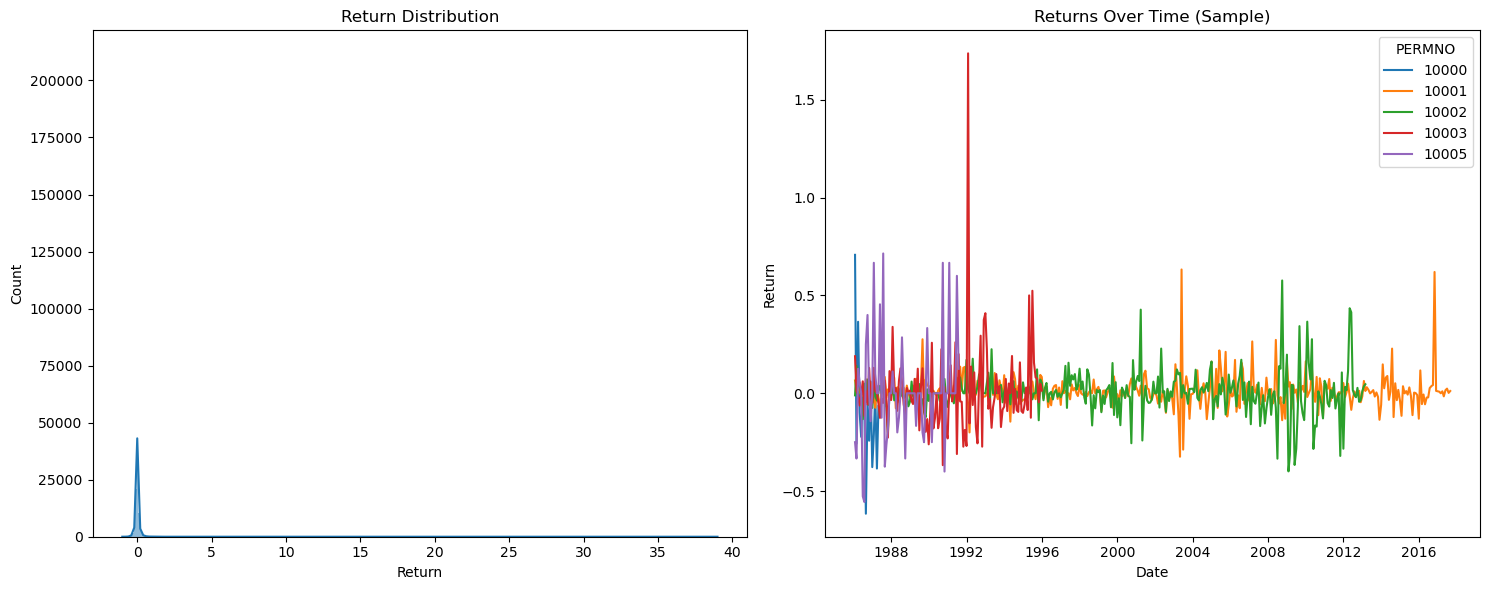


=== Time Range ===
Dataset spans from 1926-01-30 00:00:00 to 2024-12-31 00:00:00

=== Securities ===
Dataset contains 38851 unique securities

=== Observations per Security ===
Mean: 131.17
Median: 78.00
Min: 1
Max: 1405

=== Extreme Returns ===
Found 76136 returns with absolute value > 50.0%
     PERMNO   MthCalDt    MthRet     CUSIP  SICCD   NAICS  PERMCO    sprtrn
0     10000 1986-01-31  0.707317  68391610   3990       0    7952  0.002367
7     10000 1986-08-29 -0.615385  68391610   3990       0    7952  0.071193
227   10001 2003-05-30  0.632495  29274A10   4920       0    7953  0.050899
389   10001 2016-10-31  0.619769  36720410   4925  221210    7953 -0.019426
673   10002 2008-09-30  0.576326  05978R10   6020  551111    7954 -0.090791

=== Return-Market Correlation ===
         MthRet   sprtrn
MthRet  1.00000  0.26722
sprtrn  0.26722  1.00000
Data exported to PostProcessed/Returns/processed_returns.parquet


'PostProcessed/Returns/processed_returns.parquet'

In [1]:
from preprocessing.preprocessing_returns import ReturnPreprocessor

# Set the file path to your returns dataset
file_path = "datasets/Targets/monthly_crsp.csv"  # Replace with your actual file path

# Create an instance of the ReturnPreprocessor
processor = ReturnPreprocessor(
    id_column='PERMNO',
    date_column='MthCalDt',
    return_column='MthRet',
    market_return_column='sprtrn'
)

# Load the dataset (use nrows parameter if the dataset is very large)
# For example, to load just the first 100,000 rows for initial exploration:
processor.load(file_path)

processor.select_essential_columns()

# Display the first few rows of the dataset
print("\n=== First 5 rows of the dataset ===")
processor.data.head()

# Check for missing values in the dataset
missing_values = processor.check_missing_values()

# Handle missing values
processor.handle_missing_values()

# Convert date column to datetime format
processor.convert_dates()

# Get summary statistics about the dataset
processor.summarize()

# Plot return distribution and time series
processor.plot_returns_overview(sample_size=5)

# Additional analysis: Check the time range of the dataset
min_date = processor.data[processor.date_column].min()
max_date = processor.data[processor.date_column].max()
print(f"\n=== Time Range ===")
print(f"Dataset spans from {min_date} to {max_date}")

# Count the number of unique securities in the dataset
unique_securities = processor.data[processor.id_column].nunique()
print(f"\n=== Securities ===")
print(f"Dataset contains {unique_securities} unique securities")

# Calculate average number of observations per security
obs_per_security = processor.data.groupby(processor.id_column).size()
print(f"\n=== Observations per Security ===")
print(f"Mean: {obs_per_security.mean():.2f}")
print(f"Median: {obs_per_security.median():.2f}")
print(f"Min: {obs_per_security.min()}")
print(f"Max: {obs_per_security.max()}")

# Check for extreme returns
extreme_threshold = 0.5  # 50% return in a month
extreme_returns = processor.data[abs(processor.data[processor.return_column]) > extreme_threshold]
print(f"\n=== Extreme Returns ===")
print(f"Found {len(extreme_returns)} returns with absolute value > {extreme_threshold*100}%")
if len(extreme_returns) > 0:
    print(extreme_returns.head())

# Correlation between stock returns and market returns
correlation = processor.data[[processor.return_column, processor.market_return_column]].corr()
print(f"\n=== Return-Market Correlation ===")
print(correlation)

# Get the processed data for further analysis or modeling
returns_data = processor.get_data()

# Optional: Export the processed data to a parquet file for efficient storage
processor.export("PostProcessed/Returns/processed_returns.parquet", format="parquet")
